Import Necessary Libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import warnings
for warning in [FutureWarning, UserWarning]:
    warnings.filterwarnings("ignore", category=warning)

Import Temperature Data

In [ ]:
df = pd.read_csv('temperature.csv')

Analyze the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48470 entries, 0 to 48469
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   record_id                          48470 non-null  int64  
 1   month                              48470 non-null  int64  
 2   day                                48470 non-null  int64  
 3   year                               48470 non-null  int64  
 4   AverageTemperatureFahr             47541 non-null  float64
 5   AverageTemperatureUncertaintyFahr  47541 non-null  float64
 6   City                               47986 non-null  object 
 7   country_id                         47986 non-null  object 
 8   Country                            47986 non-null  object 
 9   Latitude                           48470 non-null  object 
 10  Longitude                          48470 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 4.1+ 

Clean the data to only show the past century

In [16]:
df = df[df['year'] >= 1900]
df.head()

,record_id,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
564,474940,1,1,1900,63.5216,33.4292,Auckland,NEW,New Zealand,36.17S,175.03E
565,474941,2,1,1900,64.9418,34.8314,Auckland,NEW,New Zealand,36.17S,175.03E
566,474942,3,1,1900,65.7050,33.9314,Auckland,NEW,New Zealand,36.17S,175.03E
567,474943,4,1,1900,63.8816,36.0518,Auckland,NEW,New Zealand,36.17S,175.03E
568,474944,5,1,1900,58.0010,33.1556,Auckland,NEW,New Zealand,36.17S,175.03E


Visualize the temperature trends over time

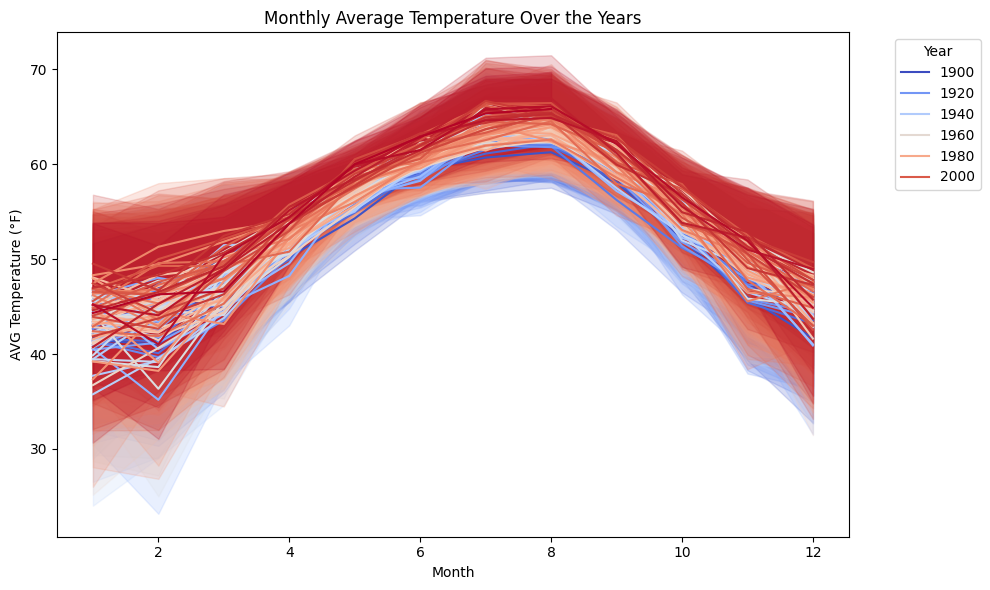

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='AverageTemperatureFahr', hue="year", palette="coolwarm", data=df)
plt.title("Monthly Average Temperature Over the Years")
plt.xlabel("Month")
plt.ylabel("AVG Temperature (°F)")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Visualize yearly temperature changes

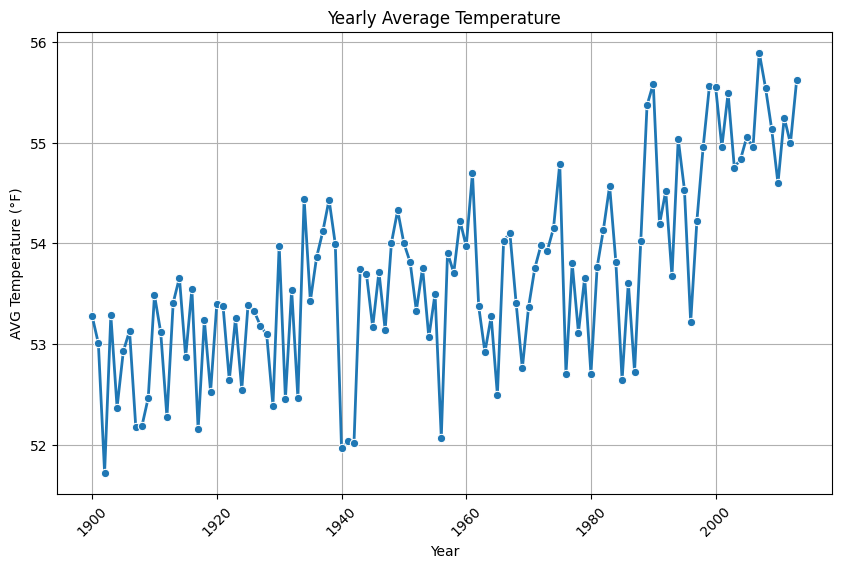

In [40]:
plt.figure(figsize=(10, 6))
avg_yearly_temp = df.groupby('year')['AverageTemperatureFahr'].mean()
sns.lineplot(x=avg_yearly_temp.index, y=avg_yearly_temp.values, marker='o', palette="coolwarm", linewidth=2)
plt.title("Yearly Average Temperature")
plt.xlabel("Year")
plt.ylabel("AVG Temperature (°F)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()